# 파이토치 기본

- 파이토치 공식 문서 : [http://pytorch.org/](http://pytorch.org/)
- Numpy 배열과 유사한 Tensor
- GPU에서 빠른 속도로 처리되는 Tensor
- 자동 미분 계산 기능(오차역전파용)
- 그 외 신경망을 구축하기 위한 모듈들
- 직관적인 인터페이스

In [4]:
import torch
import numpy as np

## 1. 텐서

- 텐서는 파이토치의 데이터 형태
- 텐서는 단일 데이터 형식으로 된 자료들의 다차원 행렬
- 텐서는 간단한 명령어(변수 뒤에 .cuda()를 추가)를 사용해서 GPU로 연산을 수행하게 할 수 있음


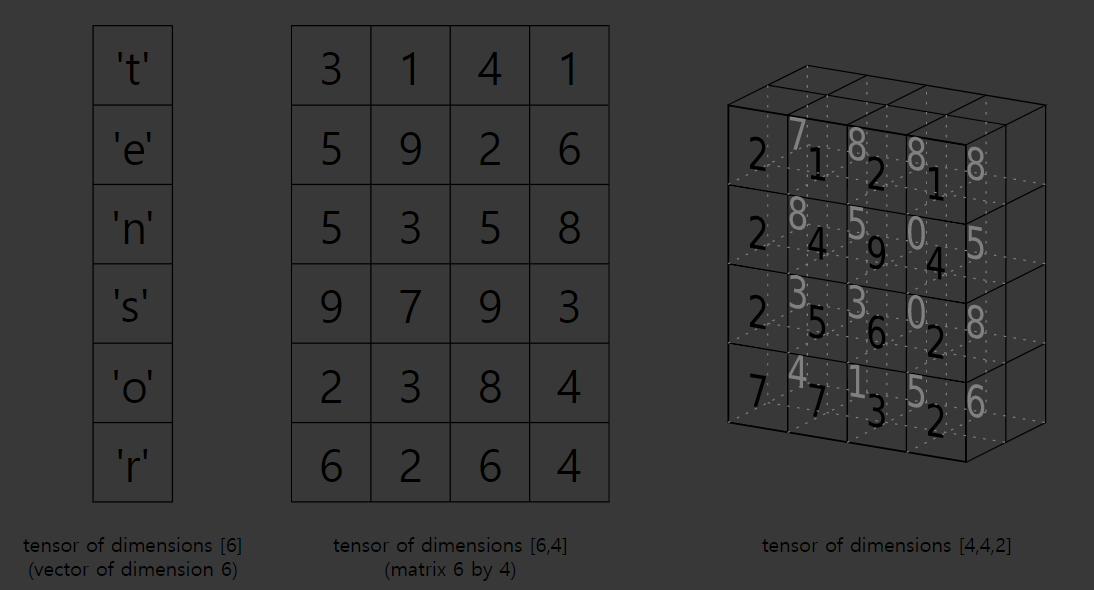

- 텐서 생성

In [ ]:
x = torch.empty(5, 4)
x

tensor([[6.8692e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [ ]:
torch.ones(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros(3)

tensor([0., 0., 0.])

In [ ]:
torch.rand(5, 6)

tensor([[0.7045, 0.7256, 0.5655, 0.2030, 0.0389, 0.6171],
        [0.9740, 0.0977, 0.2286, 0.1544, 0.4923, 0.1977],
        [0.2181, 0.0983, 0.1809, 0.3818, 0.4117, 0.0270],
        [0.7243, 0.3853, 0.8506, 0.7785, 0.3358, 0.4241],
        [0.2746, 0.1635, 0.2497, 0.6930, 0.8520, 0.2226]])

In [ ]:
torch.randn(5, 6)

tensor([[-0.1693, -0.0448,  0.5025,  1.3015,  1.2003,  2.2596],
        [ 0.1836,  0.2836,  0.2877, -0.3131,  1.1389, -0.0530],
        [ 0.3676,  0.5309,  0.2661, -0.3835, -0.6958, -2.1814],
        [-2.0223, -1.5882,  0.2707,  0.1200,  2.2613,  1.7122],
        [ 0.9237, -0.5950, -0.2026, -0.8019, -1.2876, -1.1098]])

In [ ]:
l = [3, 4]
torch.tensor(l)

tensor([3, 4])

In [ ]:
n = np.array([4, 5, 6])
torch.tensor(n)

tensor([4, 5, 6])

- 텐서 사이즈

In [ ]:
x = torch.empty(5, 4)
x.shape

torch.Size([5, 4])

In [ ]:
x.size()

torch.Size([5, 4])

In [ ]:
x.size()[0], x.size()[1]

(5, 4)

In [ ]:
x.size(0), x.size(1)

(5, 4)

- 텐서 타입

In [ ]:
type(x)

torch.Tensor

In [ ]:
x.dtype  # 개별 원소의 타입

torch.float32

In [ ]:
a = torch.tensor([1, 2, 3])
a

tensor([1, 2, 3])

In [ ]:
a.dtype

torch.int64

In [ ]:
b = torch.tensor([1.1, 2.1, 3.1])
b

tensor([1.1000, 2.1000, 3.1000])

In [ ]:
b.dtype

torch.float32

In [ ]:
a_f = torch.tensor([1, 2, 3], dtype=torch.float32)
a_f

tensor([1., 2., 3.])

In [ ]:
a_f.dtype

torch.float32

In [ ]:
c = torch.Tensor([1, 2, 3])  # 대문자 Tensor는 기본 데이터 타입이 float32, 데이터 타입을 함수 내부에서 지정할 수 없음
c

tensor([1., 2., 3.])

In [ ]:
c.dtype

torch.float32

In [ ]:
l_t = torch.LongTensor([1, 2])
f_t = torch.FloatTensor([1, 2])
d_t = torch.DoubleTensor([1, 2])
print(l_t.dtype, f_t.dtype, d_t.dtype)

torch.int64 torch.float32 torch.float64


In [ ]:
g = d_t.type(torch.FloatTensor)  # type(): 형변환 함수
g.dtype

torch.float32

- 텐서 연산

In [ ]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

In [ ]:
x

tensor([[0.7817, 0.1375],
        [0.6540, 0.1404]])

In [ ]:
y

tensor([[0.1572, 0.3725],
        [0.4727, 0.9768]])

In [ ]:
x + y

tensor([[0.9389, 0.5099],
        [1.1268, 1.1172]])

In [ ]:
torch.add(x, y)

tensor([[0.9389, 0.5099],
        [1.1268, 1.1172]])

In [ ]:
x.add(y)

tensor([[0.9389, 0.5099],
        [1.1268, 1.1172]])

In [ ]:
y.add(x)

tensor([[0.9389, 0.5099],
        [1.1268, 1.1172]])

In [ ]:
y

tensor([[0.1572, 0.3725],
        [0.4727, 0.9768]])

In [ ]:
y.add_(x)  # 언더바 '_'는 inplace와 같은 역할
y

tensor([[1.7206, 0.6474],
        [1.7808, 1.2576]])

In [ ]:
x

tensor([[0.7817, 0.1375],
        [0.6540, 0.1404]])

- 텐서 색인

In [ ]:
y[0]

tensor([1.7206, 0.6474])

In [ ]:
y[:, 1:]

tensor([[0.6474],
        [1.2576]])

In [ ]:
y[: 1]

tensor([[1.7206, 0.6474]])

- 텐서의 크기 변환(reshaping)

In [ ]:
x = torch.rand(8, 8)
x.size

<function Tensor.size>

In [ ]:
a = x.view(64)   # numpy reshape 가능
a.size()

torch.Size([64])

In [ ]:
a

tensor([0.9058, 0.5379, 0.9900, 0.0976, 0.2623, 0.0238, 0.9735, 0.9788, 0.5824,
        0.4389, 0.7387, 0.0117, 0.0015, 0.7970, 0.6099, 0.2082, 0.9710, 0.9203,
        0.8076, 0.8778, 0.2247, 0.0994, 0.4006, 0.8167, 0.0559, 0.9680, 0.3743,
        0.0186, 0.5689, 0.4714, 0.2103, 0.5088, 0.5138, 0.7453, 0.9463, 0.9752,
        0.8517, 0.8102, 0.4973, 0.5116, 0.5681, 0.1635, 0.3526, 0.3805, 0.9329,
        0.3194, 0.0470, 0.7813, 0.1701, 0.4936, 0.9742, 0.7100, 0.1177, 0.6863,
        0.7186, 0.7973, 0.7413, 0.1532, 0.4025, 0.0703, 0.6442, 0.7175, 0.0708,
        0.9412])

In [ ]:
b = x.view(16, 4)
b.size

<function Tensor.size>

In [ ]:
b

tensor([[0.9058, 0.5379, 0.9900, 0.0976],
        [0.2623, 0.0238, 0.9735, 0.9788],
        [0.5824, 0.4389, 0.7387, 0.0117],
        [0.0015, 0.7970, 0.6099, 0.2082],
        [0.9710, 0.9203, 0.8076, 0.8778],
        [0.2247, 0.0994, 0.4006, 0.8167],
        [0.0559, 0.9680, 0.3743, 0.0186],
        [0.5689, 0.4714, 0.2103, 0.5088],
        [0.5138, 0.7453, 0.9463, 0.9752],
        [0.8517, 0.8102, 0.4973, 0.5116],
        [0.5681, 0.1635, 0.3526, 0.3805],
        [0.9329, 0.3194, 0.0470, 0.7813],
        [0.1701, 0.4936, 0.9742, 0.7100],
        [0.1177, 0.6863, 0.7186, 0.7973],
        [0.7413, 0.1532, 0.4025, 0.0703],
        [0.6442, 0.7175, 0.0708, 0.9412]])

In [ ]:
c = x.view(-1, 4)
c.size()

torch.Size([16, 4])

In [ ]:
c

tensor([[0.9058, 0.5379, 0.9900, 0.0976],
        [0.2623, 0.0238, 0.9735, 0.9788],
        [0.5824, 0.4389, 0.7387, 0.0117],
        [0.0015, 0.7970, 0.6099, 0.2082],
        [0.9710, 0.9203, 0.8076, 0.8778],
        [0.2247, 0.0994, 0.4006, 0.8167],
        [0.0559, 0.9680, 0.3743, 0.0186],
        [0.5689, 0.4714, 0.2103, 0.5088],
        [0.5138, 0.7453, 0.9463, 0.9752],
        [0.8517, 0.8102, 0.4973, 0.5116],
        [0.5681, 0.1635, 0.3526, 0.3805],
        [0.9329, 0.3194, 0.0470, 0.7813],
        [0.1701, 0.4936, 0.9742, 0.7100],
        [0.1177, 0.6863, 0.7186, 0.7973],
        [0.7413, 0.1532, 0.4025, 0.0703],
        [0.6442, 0.7175, 0.0708, 0.9412]])

In [ ]:
d = x.view(-1, 4, 4)
d.size()

torch.Size([4, 4, 4])

In [ ]:
d

tensor([[[0.9058, 0.5379, 0.9900, 0.0976],
         [0.2623, 0.0238, 0.9735, 0.9788],
         [0.5824, 0.4389, 0.7387, 0.0117],
         [0.0015, 0.7970, 0.6099, 0.2082]],

        [[0.9710, 0.9203, 0.8076, 0.8778],
         [0.2247, 0.0994, 0.4006, 0.8167],
         [0.0559, 0.9680, 0.3743, 0.0186],
         [0.5689, 0.4714, 0.2103, 0.5088]],

        [[0.5138, 0.7453, 0.9463, 0.9752],
         [0.8517, 0.8102, 0.4973, 0.5116],
         [0.5681, 0.1635, 0.3526, 0.3805],
         [0.9329, 0.3194, 0.0470, 0.7813]],

        [[0.1701, 0.4936, 0.9742, 0.7100],
         [0.1177, 0.6863, 0.7186, 0.7973],
         [0.7413, 0.1532, 0.4025, 0.0703],
         [0.6442, 0.7175, 0.0708, 0.9412]]])

In [ ]:
d.resize(16, 4)

/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:760: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[0.9058, 0.5379, 0.9900, 0.0976],
        [0.2623, 0.0238, 0.9735, 0.9788],
        [0.5824, 0.4389, 0.7387, 0.0117],
        [0.0015, 0.7970, 0.6099, 0.2082],
        [0.9710, 0.9203, 0.8076, 0.8778],
        [0.2247, 0.0994, 0.4006, 0.8167],
        [0.0559, 0.9680, 0.3743, 0.0186],
        [0.5689, 0.4714, 0.2103, 0.5088],
        [0.5138, 0.7453, 0.9463, 0.9752],
        [0.8517, 0.8102, 0.4973, 0.5116],
        [0.5681, 0.1635, 0.3526, 0.3805],
        [0.9329, 0.3194, 0.0470, 0.7813],
        [0.1701, 0.4936, 0.9742, 0.7100],
        [0.1177, 0.6863, 0.7186, 0.7973],
        [0.7413, 0.1532, 0.4025, 0.0703],
        [0.6442, 0.7175, 0.0708, 0.9412]])

In [ ]:
d

tensor([[[0.9058, 0.5379, 0.9900, 0.0976],
         [0.2623, 0.0238, 0.9735, 0.9788],
         [0.5824, 0.4389, 0.7387, 0.0117],
         [0.0015, 0.7970, 0.6099, 0.2082]],

        [[0.9710, 0.9203, 0.8076, 0.8778],
         [0.2247, 0.0994, 0.4006, 0.8167],
         [0.0559, 0.9680, 0.3743, 0.0186],
         [0.5689, 0.4714, 0.2103, 0.5088]],

        [[0.5138, 0.7453, 0.9463, 0.9752],
         [0.8517, 0.8102, 0.4973, 0.5116],
         [0.5681, 0.1635, 0.3526, 0.3805],
         [0.9329, 0.3194, 0.0470, 0.7813]],

        [[0.1701, 0.4936, 0.9742, 0.7100],
         [0.1177, 0.6863, 0.7186, 0.7973],
         [0.7413, 0.1532, 0.4025, 0.0703],
         [0.6442, 0.7175, 0.0708, 0.9412]]])

In [ ]:
d.resize_(16, 4)

tensor([[0.9058, 0.5379, 0.9900, 0.0976],
        [0.2623, 0.0238, 0.9735, 0.9788],
        [0.5824, 0.4389, 0.7387, 0.0117],
        [0.0015, 0.7970, 0.6099, 0.2082],
        [0.9710, 0.9203, 0.8076, 0.8778],
        [0.2247, 0.0994, 0.4006, 0.8167],
        [0.0559, 0.9680, 0.3743, 0.0186],
        [0.5689, 0.4714, 0.2103, 0.5088],
        [0.5138, 0.7453, 0.9463, 0.9752],
        [0.8517, 0.8102, 0.4973, 0.5116],
        [0.5681, 0.1635, 0.3526, 0.3805],
        [0.9329, 0.3194, 0.0470, 0.7813],
        [0.1701, 0.4936, 0.9742, 0.7100],
        [0.1177, 0.6863, 0.7186, 0.7973],
        [0.7413, 0.1532, 0.4025, 0.0703],
        [0.6442, 0.7175, 0.0708, 0.9412]])

In [ ]:
d

tensor([[0.9058, 0.5379, 0.9900, 0.0976],
        [0.2623, 0.0238, 0.9735, 0.9788],
        [0.5824, 0.4389, 0.7387, 0.0117],
        [0.0015, 0.7970, 0.6099, 0.2082],
        [0.9710, 0.9203, 0.8076, 0.8778],
        [0.2247, 0.0994, 0.4006, 0.8167],
        [0.0559, 0.9680, 0.3743, 0.0186],
        [0.5689, 0.4714, 0.2103, 0.5088],
        [0.5138, 0.7453, 0.9463, 0.9752],
        [0.8517, 0.8102, 0.4973, 0.5116],
        [0.5681, 0.1635, 0.3526, 0.3805],
        [0.9329, 0.3194, 0.0470, 0.7813],
        [0.1701, 0.4936, 0.9742, 0.7100],
        [0.1177, 0.6863, 0.7186, 0.7973],
        [0.7413, 0.1532, 0.4025, 0.0703],
        [0.6442, 0.7175, 0.0708, 0.9412]])

In [ ]:
d.size()

torch.Size([16, 4])

In [ ]:
e = d.view(4, 4, 4)
e.size()

torch.Size([4, 4, 4])

In [ ]:
f = torch.flatten(e)
f.size()

torch.Size([64])

In [ ]:
f = torch.flatten(e, 0)  # 0번 dim부터 flatten
f.size()

torch.Size([64])

In [ ]:
f = torch.flatten(e, 1)  # 1번 dim부터 flatten
f.size()

torch.Size([4, 16])

In [ ]:
g = torch.flatten(e, 2)  # 2번 dim부터 flatten
g.size()

torch.Size([4, 4, 4])

- 텐서에서 넘파이 배열로, 넘파이 배열에서 텐서로

In [ ]:
g

tensor([[[0.9058, 0.5379, 0.9900, 0.0976],
         [0.2623, 0.0238, 0.9735, 0.9788],
         [0.5824, 0.4389, 0.7387, 0.0117],
         [0.0015, 0.7970, 0.6099, 0.2082]],

        [[0.9710, 0.9203, 0.8076, 0.8778],
         [0.2247, 0.0994, 0.4006, 0.8167],
         [0.0559, 0.9680, 0.3743, 0.0186],
         [0.5689, 0.4714, 0.2103, 0.5088]],

        [[0.5138, 0.7453, 0.9463, 0.9752],
         [0.8517, 0.8102, 0.4973, 0.5116],
         [0.5681, 0.1635, 0.3526, 0.3805],
         [0.9329, 0.3194, 0.0470, 0.7813]],

        [[0.1701, 0.4936, 0.9742, 0.7100],
         [0.1177, 0.6863, 0.7186, 0.7973],
         [0.7413, 0.1532, 0.4025, 0.0703],
         [0.6442, 0.7175, 0.0708, 0.9412]]])

In [ ]:
type(g)

torch.Tensor

In [ ]:
g_n = g.numpy()  # tensor를 numpy로
type(g_n)

numpy.ndarray

In [ ]:
g_t = torch.from_numpy(g_n)  # numpy를 tensor로
type(g_t)

torch.Tensor

- 단일 텐서에서 값으로 변환하기

In [ ]:
x = torch.ones(1)
x

tensor([1.])

In [ ]:
x.item()

1.0

## 2. 역전파

In [5]:
x = torch.ones(2, 2, requires_grad = True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [6]:
y = x + 1
y

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [7]:
z = 2*y**2
z

tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)

In [8]:
l = z.mean()
l

tensor(8., grad_fn=<MeanBackward0>)

In [9]:
l.backward()

In [ ]:
# y 는 x에 대한 식, z는 y에 대한 식, l은 z에 대한 식
# 최종식은 합성함수로 표현될 수 있으므로 l은 x로 표현이 가능하고 미분도 가능하다.

In [10]:
x.grad

tensor([[2., 2.],
        [2., 2.]])